# Problem 1 Logistic Regression

## 1.1 Fit a logistic regression model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

class LogisticRegressionGD:
    def __init__(self, lr=0.01, fit_intercept=True, max_epoch=1e5, tolerance=1e-7, verbose=True):
        self.lr = lr
        self.fit_intercept = fit_intercept
        self.max_epoch = max_epoch
        self.tolerance = tolerance
        self.verbose = True

    def add_intercept(self, X):
        # add an extra column for the intercept
        intercept = np.ones([X.shape[0], 1])
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # calculate the loss
        # return the loss
        
        # TODO
        
        n = h.shape[0]
        return -(1/n) * np.sum(y@np.log(sigmoid(h)) + (1-y)@np.log(1-sigmoid(h)))

    def fit(self, X, y):
        '''
        Parameters
        ----------
        X : shape (n_samples, n_features)
            Training data
        y : shape (n_samples,)
            Target values, 1 or 0
        epochs : The number of epochs
        '''

        # initialize the parameters
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # initialize the coefficients
        self.theta = np.zeros(X.shape[1])

        tol = 1e10
        n_epoch = 1
        while tol > self.tolerance and n_epoch <= self.max_epoch:
            old_theta = self.theta.copy()
            
            # TODO:
            # calculate predictions
            # pred.shape: [n_samples, 1]
            pred = np.dot(X,self.theta)
            p_x = self.sigmoid(pred)
            
            # calculate gradients
            # grad.shape:  [n_features, 1]
            n = X.shape[0]
            gradient = -(1/n)* np.dot(X.T,(y-p_x))
            
            # update the coefficients
            self.theta = self.theta-self.lr*gradient
            # END
            
            n_epoch += 1
            tol = np.sum(np.abs(self.theta - old_theta))

    def predict(self, X, threshold):
        """
        Parameters
        ----------
        X : shape (n_samples, n_features)
        threshold : threshold for make decision
        Returns
        -------
        y : shape (n_samples,)
            Predicted class label per sample, 1 or 0
        """
        # TODO
        
        # add the intercept to X
        if self.fit_intercept:
            X = self.add_intercept(X)
        # get the prediction y
        pred = self.sigmoid(np.dot(X,self.theta))
        # return prediction y
        return pred >= threshold
        

In [3]:
# read the data, transform the target variable y to 0/1 values
# TODO
X = pd.read_csv("logistic_x.txt",header=None,delimiter='\s+').to_numpy()
y = pd.read_csv("logistic_y.txt",header=None,delimiter='\s+').to_numpy()

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)



E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [4]:
# fit the model using the data, and print out the model coefficients w
# we include the intercept term, so w is a vector with 3 components
# print out the model coeffcients
# TODO
logicRegressor = LogisticRegressionGD()
logicRegressor.fit(X,y)
print(logicRegressor.theta)

[-2.62004691  0.76026934  1.17191257]


## 1.2 Plot the training data and the decision boundary

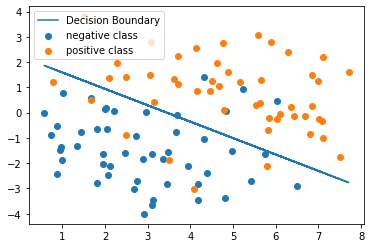

In [5]:
# plot the training data (x axis: first feature, y axis: second feature), use different labels for the two classes

# on the same figure, plot the boundary, a straight line showing the boundary separating p>0.5 from p<=0.5

# TODO

class_zero = X[y==0]
class_one = X[y==1]
plt.scatter(class_zero[:,0],class_zero[:,1],label="negative class")
plt.scatter(class_one[:,0],class_one[:,1],label="positive class")

params = logicRegressor.theta
intercept = params[0]
x_value = X[:,0]
y_value = - (intercept + np.dot(params[1],x_value))/params[2]
plt.plot(x_value,y_value,label="Decision Boundary")
plt.legend()
plt.show()